In [2]:
# Steps
# 1: X Input Image
# 2: X input spline coords
# 3. X Plot parametric lines on image
# 4. Define intensity of warp by shortening length of spline
#    Factor of 'intensity' in x and y direction

In [2]:
import cv2 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('englishmansbay.jpg')

if img is None:
    print('Could not open or find the image: ', args.input1)
    exit(0)

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
# Spleen 1
s1p1 = [3115, 1910];
s1p2 = [2919, 1826];
s1p3 = [2815, 1794];
s1p4 = [2671, 1750];
s1p5 = [2499, 1722];
s1p6 = [2351, 1698];

sl_x = [s1p1[0], s1p2[0], s1p3[0], s1p4[0], s1p5[0], s1p6[0]];
sl_y = [s1p1[1], s1p2[1], s1p3[1], s1p4[1], s1p5[1], s1p6[1]];

sl = np.column_stack((sl_x, sl_y));

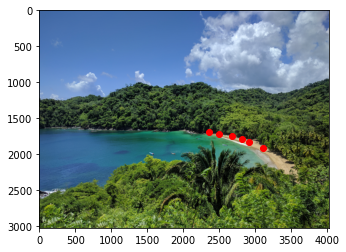

In [6]:
# Plot Spleen on image
plt.plot(sl_x, sl_y, 'o', color="red")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# Spline can be represented as set of parametric equations
# Fit line to x coordinates
# Polyfit returns polynomial (of specified degrees) coefficients for a set of points 
# Poly1d(polynomial_coefficients) evaluates a polynomial with the given coefficients
t = [1, 2, 3, 4, 5, 6]

coefficients_x = np.polyfit(t, sl_x, 2);
p_x = np.poly1d(coefficients_x);

In [8]:
# Fit line to y coordinates
coefficients_y = np.polyfit(t, sl_y, 2);
p_y = np.poly1d(coefficients_y);

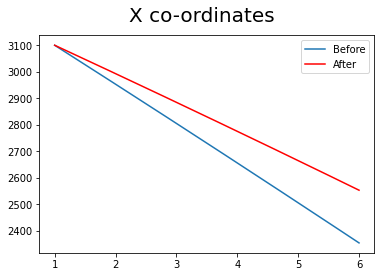

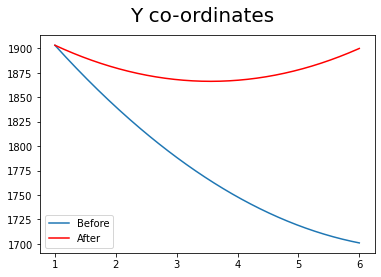

In [29]:
# Plot x and y coordinates as parametrix equations
n=200
offset = 1;
t = np.linspace(1, 6, n)

# Calculate spline coordinates after shrink
Xp = p_x(t)+(offset * np.arange(n))
Yp = p_y(t)+(offset * np.arange(n))

fig = plt.figure()
plt.plot(t, p_x(t), '-', label='Before')
plt.plot(t, Xp, '-', label='After', color='red')

fig.suptitle('X co-ordinates', fontsize=20)
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(t, p_y(t), '-', label='Before')
plt.plot(t, Yp, '-', label='After', color='red')

fig.suptitle('Y co-ordinates', fontsize=20)
plt.legend()
plt.show()

In [ ]:
def get_new_spline(px, py, factor):
    if factor > 1:
        print("Factor must be less than 1")
        return -1
    
    # Get number of points in spline
    n=old_spline.shape[0]
    t = np.linspace(1, 6, n)
    
    

3245.400000000001

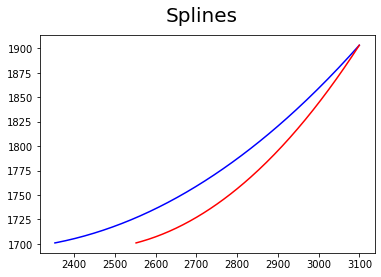

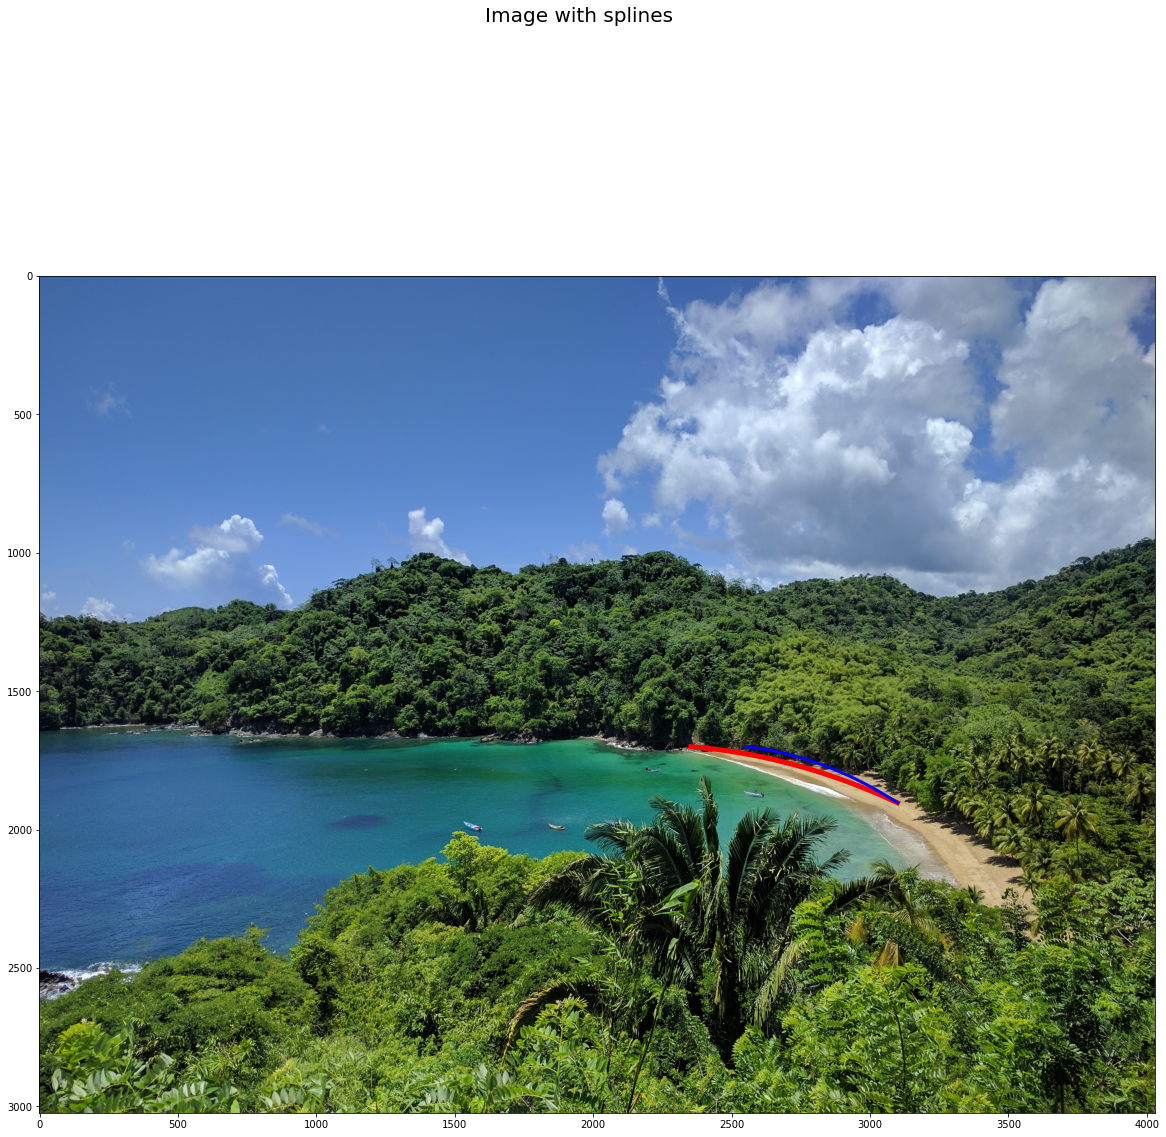

In [34]:
# Find new spline
n=200
offset = 1;
t = np.linspace(1, 6, n)

Xp = p_x(t)+(offset * np.arange(n))
Yp = p_y(t)#+(offset * np.arange(n))

fig1 = plt.figure()
new_spline = np.column_stack((Xp, Yp));
plt.plot(p_x(t), p_y(t), '-', color='blue')
plt.plot(Xp, Yp, '-', color='red')

fig1.suptitle('Splines', fontsize=20)
plt.show()

# Plot Spline on image
fig2 = plt.figure(figsize=(20,20))
plt.plot(p_x(t), p_y(t), '-', color="red", linewidth=5)
plt.plot(Xp, Yp, '-', color="blue", linewidth=3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
fig2.suptitle('Image with splines', fontsize=20)
plt.show()

In [32]:
sl.shape[0]

6

In [22]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[rows, cols] = img_gray.shape

# Create image-size matrixes for x coordinates and y coordinates
X_COORD_MATRIX = np.ones((rows,1)) * np.arange(1,cols+1)

rows_range = np.arange(1,rows+1)[:, np.newaxis]
Y_COORD_MATRIX = rows_range * np.ones(cols)


# coords = [X(:)'; Y(:)'];